## Pérez Angeles Adrián

1. Guerra de Métodos
Determina las raíces de las siguientes funciones con el método que prefieras. Explica
cual es el método ideal para cada función y reporta el error numérico adecuadamente.
Gráfica las funciones para que determines el intervalo a evaluar, si hay varios intervalos
posibles, escoge el que prefieras explicando el porque escoges este intervalo

i) Encuentra las dos raíces de $2x^{2} + 5x − 3=0$

ii) $f(x) = cos(x) + (1 + x^{2})^{−1}$

iii) $f(x) = (x − 2)^{2} − ln(x)$

iv) $x^{3} − 14x + 50$

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import pandas as pd
from pylab import *
import math

In [73]:
# Metodos raices

#busqueda incremental
def incremental(f,a,b,dx): #Es bueno el metodo para funciones discontinuas o que sea complicado determinar su derivada
    x0=a;f0=f(x0)          #lo malo es el tiempo computacional
    x1=x0+dx;f1=f(x1)
    contador=0.0
    while f0*f1>0.0:
        if x1>=b: return ('nada') #salgo del bucle infinito
        x0=x1;f0=f1
        x1=x0+dx;f1=f(x1)
        contador=contador+1
    return [x1,contador]

#Metodo de la bisección 
def biseccion(f,a,b,epsilon): #Es bueno para bajar el error dependiendo de la iteración(baja a un medio) por la proporción aurea
    contador=0                #lo malo es la convergencia lenta para funciones con multiples derivadas
    dx=abs(b-a)
    while dx>epsilon:
        x=(a+b)/2.0
        if (f(a)*f(x))<0:
            b=x #izquierda
        else:
            a=x #derecho
        dx=abs(b-a) #renombrar intervalo
        contador=contador+1
    return [x, contador]

#Metodo de Newton Raphson 
def newton(f,df,x,epsilon=1e-6): #La convergencia es rapida, es un metodo intuitivo, se puede generalizar a ecuaciones no lineales  
    dx=2*epsilon                 #No siempre converge, hay problema cuando f'=0 y se requiere conocer la derivada de f
    contador = 0
    while dx> epsilon and contador<1000:
        x1=x-f(x)/df(x)
        dx=abs(x-x1)
        x=x1
        contador=contador+1
    return [x,contador]

#Metodo de la secante
def secante(f, x0, x1, delta=1e-9): #La convergencia es lineal y no es necesario conocer la derivada
    f0 = f(x0)                      #No hay limite garantizado para el error, tiene el mismo problema que newton de f'=0 truena el metodo
    f1 = f(x1)
    res = [[x0, f(x0), np.nan], #nan es el paso inicial del Data Frame
           [x1, f(x1), x1 - x0],]
    while True: 
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0) #secante
        f2 = f(x2)
        res.append([x2, f2, x2-x1])
        if abs(f2) < delta:
            break
        f0 = f1
        f1 = f2
        x0 = x1
        x1 = x2
    return res

#error numerico 
def error_absoluto(real,approx):
    return abs(real-approx)

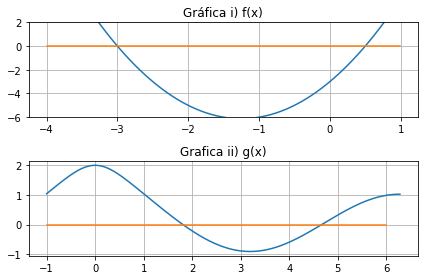

In [39]:
subplot(211) #Grafica i)
t= arange (-4 ,1 ,0.01)
plot (t,f(t))
plot(t,0*t)
#xlim (-2.5, 0.5)
ylim (-6, 2)
title ('Gráfica i) f(x)')
grid ( True )
subplot(212) #Grafica de ii)
t1= arange (-1 ,2*pi ,0.01)
x1= arange (-1 ,2*pi )
plot(t1,g(t1))
plot(x1,x1*0)
grid(True)
title ('Grafica ii) g(x)')
tight_layout ()
show()

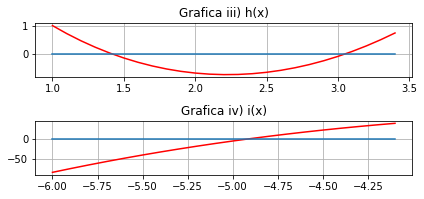

In [130]:
subplot(312)
t2=arange(1, 3.5, 0.1)
plot(t2, h(t2), 'r-')
plot(t2,t2*0)
title('Grafica iii) h(x)')
grid(True)
subplot(313)
t3=arange(-6,-4,0.1)
plot(t3,i(t3), 'r-')
plot(t3, t3*0)
title('Grafica iv) i(x)')
grid(True)
tight_layout()
show()

Todos los intervalos se tomaran a partir de las graficas, intentando acercarnos lo mas posible al valor de las raices para evitar en caso de usar busqueda incremental y bisección un mayor tiempo de pasos(tiempo computacional)

In [98]:
#i)
def f(x):                          #Como es continua y diferenciable se pueden usar cualquiera de los 4 metodos
    return 2*x**2+5*x-3            #se utilizaron Newton y busqueda incremental para observar la diferencia de tiempo entre uno y otro
df=lambda x: 4*x+5 #se usa para funciones cortas que no requieren ciclos
print("Las raices de f(x) teoricas son x=-3, x=1/2 ")
print("las raices de f(x) usando Newton-Raphson son: ", newton(F, df, -4, 1e-9), "y", newton(F, df, 2, 1e-9), "y su error numerico es: ", error_absoluto(-3,-3), "y ", error_absoluto(1/2, 0.5))
print("Las raices de f(x) usando la busqueda incremental son: ",incremental(f,-4,-2,1e-6), "y", incremental(f,-1,1,1e-6), "y su error numerico es: ", error_absoluto(-3,-2.999999999860222), "y ", error_absoluto(1/2, 0.5000000000014588))

Las raices de f(x) teoricas son x=-3, x=1/2 
las raices de f(x) usando Newton-Raphson son:  [-3.0, 5] y [0.5, 6] y su error numerico es:  0 y  0.0
Las raices de f(x) usando la busqueda incremental son:  [-2.999999999860222, 999999.0] y [0.5000000000014588, 1499999.0] y su error numerico es:  1.397779669787269e-10 y  1.4588330543574557e-12


In [110]:
#ii) Se toma el periodo de (0,2pi] pues tiene problemas newton en f'=0 y aunque hay mas raices a lo largo de la grafica es 2pi-periodica
def g(x): #Se utilizo el metodo de Newton y secante para comparar la precisión de cada uno solo teniendo problemas con f'=0 
    return cos(x)+1/(1+x**2)
dg=lambda x: -sin(x)+2*x/(1+x**2)**2
print("Las raices de g(x) son: %s y %s" %(1.8073753791825, 4.6685055191495))
print("Las raices de g(x) usando Newton son: ",newton(g,dg, 1.5, 1e-9), newton(g,dg, 4, 1e-9), "y su error numerico son: %s y %s " %(error_absoluto(1.8073753791825, 1.8073753789347038), error_absoluto(4.6685055191495, 4.66850551915576)))
print("Por el metodo de la secante")
res = secante(g, 1, 0)
pd.set_option("precision", 15)
pd.DataFrame(res, index=range(len(res)), 
                  columns=["$x_n$", "$f(x_n)$", "$x_n - x_{n-1}$"])


Las raices de g(x) son: 1.8073753791825 y 4.6685055191495
Las raices de g(x) usando Newton son:  [1.8073753789347038, 32] [4.66850551915576, 8] y su error numerico son: 2.477962279812118e-10 y 6.259881502046483e-12 
Por el metodo de la secante


,$x_n$,$f(x_n)$,$x_n - x_{n-1}$
0,1.000000000000000,1.040302305868140,NaN
1,0.000000000000000,2.000000000000000,-1.000000000000000
2,2.083989585709273,-0.303801322410652,2.083989585709273
3,1.809174745614459,-0.002105798929732,-0.274814840094814
4,1.807256570662875,0.000139094206873,-0.001918174951584
5,1.807375421319587,-0.000000049330562,0.000118850656712
6,1.807375379183461,-0.000000000001154,-0.000000042136127


In [109]:
print("Por lo que su error numerico son: %s y %s" %(error_absoluto(1.8073753791825, 1.807375379183461), error_absoluto(4.6685055191495, 4.668505519076426)))
res = secante(g, 5, 4)
pd.set_option("precision", 15)
pd.DataFrame(res, index=range(len(res)), 
                  columns=["$x_n$", "$f(x_n)$", "$x_n - x_{n-1}$"])


Por lo que su error numerico son: 9.610090501155355e-13 y 7.30739913024081e-11


,$x_n$,$f(x_n)$,$x_n - x_{n-1}$
0,5.000000000000000,0.322123723924765,NaN
1,4.000000000000000,-0.594820091451847,-1.000000000000000
2,4.648698515085725,-0.019419974929738,0.648698515085725
3,4.670592339119108,0.002047429938890,0.021893824033383
4,4.668504239925141,-0.000001255006462,-0.002088099193967
5,4.668505519076426,-0.000000000072127,0.000001279151285


In [126]:
#iii)
def h(x):
    return (x-2)**2 - log(x)       #Se usara Newton y bisección
dh=lambda x: 2*(x-2)-1/x
print("Las raices son %s y %s"%(1.5604105557099, 2.6506561218605))
print("Las raices con N-R son: %s y %s y su error numerico es: %s y %s" %(newton(h,dh, 1, 1e-9), newton(h,dh, 4, 1e-9), error_absoluto(1.5604105557099, 1.4123911720238844), error_absoluto(2.6506561218605, 3.057103549994738)))
print("Las raices con bisección son: %s y %s y su error numerico es: %s y %s" %(biseccion(h, 1, 2, 1e-8), biseccion(h, 2.5, 3.5, 1e-8), error_absoluto(1.5604105557099, 1.4123911783099174), error_absoluto(2.6506561218605, 3.0571035519242287)))

Las raices son 1.5604105557099 y 2.6506561218605
Las raices con N-R son: [1.4123911720238844, 5] y [3.057103549994738, 6] y su error numerico es: 0.14801938368601553 y 0.40644742813423784
Las raices con bisección son: [1.4123911783099174, 27] y [3.0571035519242287, 27] y su error numerico es: 0.1480193773999825 y 0.40644743006372863


In [134]:
#iv)        #solo una raíz esta definida en los reales, las otras dos son estan en el plano complejo
def i(x):
    return x**3 -14*x + 50         #Se usara bisección y busqueda incremental, se observa que el metodo de bisección realizo menos pasos que el de busqueda incremental
print("La raíz real es: -4.916320526742235")
print("La raíz calculada con el metodo de busqueda incremental es: %s y su error numerico es %s"%(incremental(i,-5.25,-4.75,1e-6), error_absoluto(-4.916320526742235, -4.916319999953359)))
print("La raíz calculada con el metodo de bisección es: %s y su error numerico es %s"%(biseccion(i,-5.25,-4.75,1e-6), error_absoluto(-4.916320526742235, -4.916319847106934)))

La raíz real es: -4.916320526742235
La raíz calculada con el metodo de busqueda incremental es: [-4.916319999953359, 333679.0] y su error numerico es 5.267888765203566e-07
La raíz calculada con el metodo de bisección es: [-4.916319847106934, 19] y su error numerico es 6.796353018145851e-07


## 2. Raíces
La ecuación de Bernoulli para el flujo de un fluído en un canal abierto con una pequeña
protuberancia es:

$$\frac{Q^{2}}{2gb^{2}h_{0}^{2}}+h_{0}=\frac{Q^{2}}{2gb^{2}h^{2}}+h+H$$
donde Q=1.2mmm/s, g=9.81m/s*s, b=1.8m, $h_{0}=0.6m$, H=0.075m, h a determinar.

Resuelve con dos métodos que prefieras. Explica porque escoges estos dos métodos.

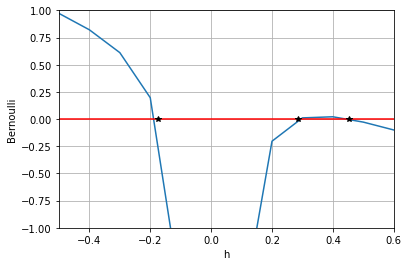

In [206]:
Q, g, b, h0, H=1.2, 9.81, 1.8, 0.6, 0.075
k=Q**2/(2*g*b**2)
def bernoulli(h):
    return (k/h0)-(k/h**2)-h-H+h0
x= arange (-1 ,1,0.1)
plot (x ,bernoulli(x))
plot(x, x*0,'r-')
plot(0.451759005750251, bernoulli(0.451759005750251), '*k')
plot(0.286199108584858, bernoulli(0.286199108584858), '*k')
plot(-0.175203744258932, bernoulli(-0.175203744258932), '*k')
xlim(-0.5,0.6)
ylim(-1,1)
xlabel ("h")
ylabel ("Bernoulli")
grid (True)
show()

In [230]:
res = secante(bernoulli, 1, 0.1)
pd.set_option("precision", 15)
pd.DataFrame(res, index=range(len(res)), 
                  columns=["$x_n$", "$f(x_n)$", "$x_n - x_{n-1}$"])

,$x_n$,$f(x_n)$,$x_n - x_{n-1}$
0,1.000000000000000,-0.459898251972666,NaN
1,0.100000000000000,-1.802507834031788,-0.900000000000000
2,1.308286513299421,-0.758766802052059,1.208286513299420
3,2.186672689149830,-1.628655837563860,0.878386175850410
4,0.542108021091362,-0.056434557340378,-1.644564668058468
5,0.483076712822648,-0.017392620893943,-0.059031308268715
6,0.456779114418433,-0.002593785546347,-0.026297598404215
7,0.452169945585727,-0.000209282513923,-0.004609168832706
8,0.451765409115322,-0.000003256870153,-0.000404536470405
9,0.451759014169858,-0.000000004282368,-0.000006394945464


In [193]:
res = secante(bernoulli, 0.3, 0.01)
pd.set_option("precision", 15)
pd.DataFrame(res, index=range(len(res)), 
                  columns=["$x_n$", "$f(x_n)$", "$x_n - x_{n-1}$"])

,$x_n$,$f(x_n)$,$x_n - x_{n-1}$
0,0.300000000000000,0.011058569612766,NaN
1,0.010000000000000,-225.973466039944043,-0.290000000000000
2,0.299985808828311,0.011048946705936,0.289985808828311
3,0.299971630698684,0.011039329267573,-0.000014178129627
4,0.283697334421272,-0.002397316355868,-0.016274296277412
5,0.286600933856687,0.000373112829900,0.002903599435414
6,0.286209886069647,0.000010049991044,-0.000391047787040
7,0.286199061423506,-0.000000043977902,-0.000010824646141
8,0.286199108584858,0.000000000005148,0.000000047161352


In [204]:
res = secante(bernoulli, -0.5, -0.1)
pd.set_option("precision", 15)
pd.DataFrame(res, index=range(len(res)), 
                  columns=["$x_n$", "$f(x_n)$", "$x_n - x_{n-1}$"])

,$x_n$,$f(x_n)$,$x_n - x_{n-1}$
0,-0.500000000000000,0.972143881904330,NaN
1,-0.100000000000000,-1.602507834031788,0.400000000000000
2,-0.348966930029856,0.725705457770625,-0.248966930029856
3,-0.271363790934644,0.526498079084976,0.077603139095212
4,-0.066261430097563,-4.530356516783078,0.205102360837081
5,-0.250009410074108,0.450349110791062,-0.183747979976545
6,-0.233395149850824,0.380301320613218,0.016614260223284
7,-0.143193516253466,-0.398821856508481,0.090201633597358
8,-0.189366424501807,0.120418403878575,-0.046172908248341
9,-0.178658341292788,0.031717485559685,0.010708083209019


In [238]:
db= lambda h: 2*k**2/h**3-1
print("El valor de la primer raiz con Newton-Raphson es %s  \n"%(newton(bernoulli , db, 0.2, 1e-9))) #con Newton solo nos arroja una raiz se probo con varias x distintas de cero
print("El valor de la primer raiz con la busqueda incremental es %s, de la segunda %s y tercera %s \n"%(incremental(bernoulli,-0.3,0.1,1e-6), incremental(bernoulli,0.1,0.4,1e-6), incremental(bernoulli,0.4,1,1e-6)))
print("El valor de la primer raiz con el metodo de la bisección es %s, de la segunda %s y de la tercera %s"%(biseccion(bernoulli, -0.3,0.1, 1e-8), biseccion(bernoulli,0.1,0.4,1e-6), biseccion(bernoulli,0.4,1,1e-6)))

El valor de la primer raiz con Newton-Raphson es [0.451759006405001, 28]  

El valor de la primer raiz con la busqueda incremental es [-0.17520300000126296, 124796.0], de la segunda [0.28619999999918144, 186199.0] y tercera [0.45175999999861516, 51759.0] 

El valor de la primer raiz con el metodo de la bisección es [-0.17520374655723567, 26], de la segunda [0.2861993789672851, 19] y de la tercera [0.45175876617431643, 20]


Se puede observar que el metodo de Newton Raphson es ineficiente pues las raices estan cerca del cero. Por otro lado tanto el metodo de la secante, como el de biseccion y de busqueda incremental arrojaron un resultado similar con 6 cifras significativas, y entre biseccion y secante se tuvo hasta 8 cifras significativas. 

Por lo que si tuviera que resolverlo con dos metodos usaria tanto el de secante como de bisección 